In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Step 1: Define the Problem

- In our case, we want to diagnose if a patient is diabetic or not.


# Step 2: Read the diabetes dataset


In [2]:
# df = pd.read_csv('diabetes.csv')

X, y = make_classification(random_state=42, n_samples=300, n_features=4, n_classes=2)

# set X between 0 and 1
scaler = MinMaxScaler(feature_range=(0,1))

X = scaler.fit_transform(X)

df = pd.DataFrame(X, columns=['Glucose', 'BloodPressure', 'BMI', 'Age'])
df['Diabetic'] = y
X.shape

(300, 4)

In [3]:
# Print records of five patientsdf.head(5))
df.head(5)

,Glucose,BloodPressure,BMI,Age,Diabetic
0,0.818275,0.074919,0.176806,0.362078,0
1,0.856084,0.052484,0.139507,0.430436,0
2,0.728119,0.152757,0.266627,0.289048,0
3,0.663785,0.178938,0.329656,0.128410,0
4,0.371666,0.635339,0.628119,0.646397,1


In [4]:
df.isna().sum() # check for missing values

Glucose          0
BloodPressure    0
BMI              0
Age              0
Diabetic         0
dtype: int64

# Step 3: ML Model Development


In [5]:
# Feature scaling
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(X)

# Our targets
y = df['Diabetic']


# Split our data: test_size = 0.2, splits our data into 80 % for training and 30% for testing.

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.20, random_state = 42) 

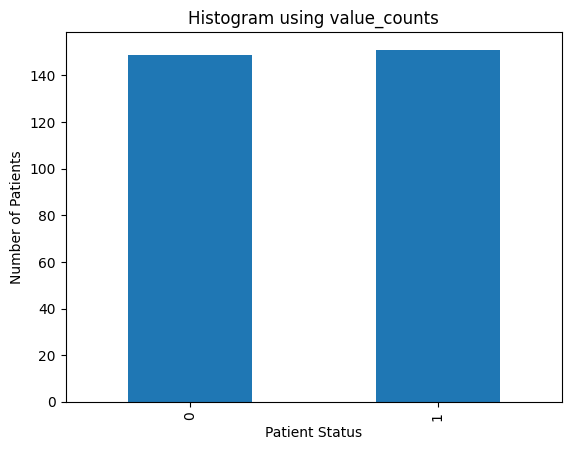

In [6]:
# check the number of patients who have diabetes and patients with out diabetes.
counts = y.value_counts().sort_index()

# Generate a histogram plot
counts.plot(kind='bar')
plt.xlabel('Patient Status')
plt.ylabel('Number of Patients')
plt.title('Histogram using value_counts')
plt.show()

In [7]:
y.value_counts()

Diabetic
1    151
0    149
Name: count, dtype: int64

# Step 4: Training Our Model


In [8]:

model = DecisionTreeClassifier() # implements the Decision Tree classifier algorithm
model.fit(X_train, y_train) # Trains the model (algorithm)

DecisionTreeClassifier()

# Step 5: Model Evaluation and Improvement


In [9]:
predictions = model.predict(X_test)

# see the first five patients condition (based on the model's output)
predictions[:5]

array([0, 0, 0, 1, 1])

In [10]:
# Evaluation Metrics

from sklearn.metrics import accuracy_score, confusion_matrix

acc = accuracy_score(y_test, predictions) * 100 # Our models's prediction accuracy
print("Model's Accuracy = ", round(acc),"%")

Model's Accuracy =  93 %


In [11]:
cm = confusion_matrix(y_test, predictions)
cm

array([[27,  1],
       [ 3, 29]])

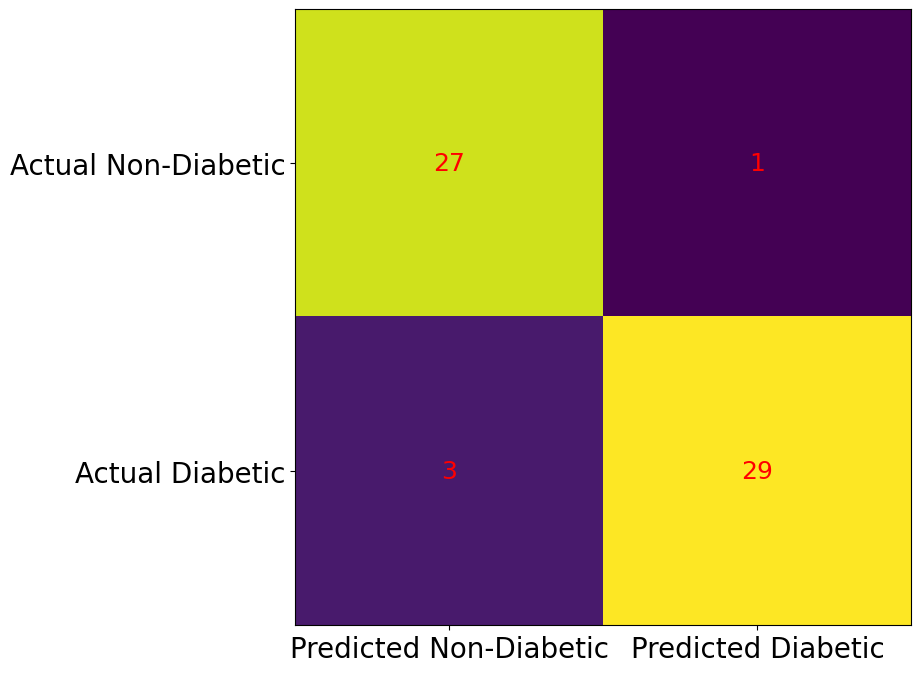

In [12]:
# Confusion Matrix Visualization
def plot_confusion_matrix(cm):
    fig , ax = plt.subplots (figsize = (8,8))
    ax.imshow (cm)
    ax.grid (False)
    ax.xaxis.set (ticks = (0 , 1) , ticklabels = ("Predicted Non-Diabetic" , "Predicted Diabetic"))
    ax.yaxis.set (ticks = (0 , 1) , ticklabels = ("Actual Non-Diabetic" , "Actual Diabetic"))

    ax.tick_params(axis='both', which='major', labelsize=20)
    #ax.tick_params(axis='both', which='minor', labelsize=20)
    #plt.xticks(fontsize=14, rotation=90)

    ax.set_ylim (1.5 , -0.5)
    for i in range (2):
        for j in range (2):
            ax.text (j , i , cm[i,j] , ha = "center" , va ="center" , color ="red", fontsize = 18 )
    plt.show()


# plot confusion matrix of the decision tree model
plot_confusion_matrix(cm)

# Let's also visualize the decision tree


In [13]:
# from sklearn import tree

# tree.plot_tree(model)[0]
# plt.show()